![](image21.png)

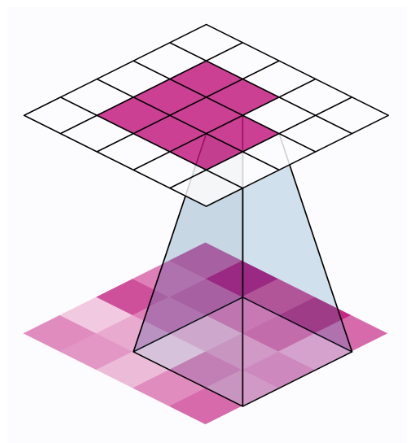

Hem convolution hem de pooling layerlerini etkileyen iki ek parametre vardır - bunlar pencerenin adımları (strides) ve görüntü kenarlarında dolgu (padding) kullanıp kullanmamaktır. Strides parametresi, pencerenin her adımda ne kadar hareket etmesi gerektiğini söyler ve padding parametresi, girişteki kenar piksellerini nasıl ele aldığımızı tanımlar.

Bu iki parametreyle, iki katmanın tanımlanması şöyle olur:

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64,
                  kernel_size=3,
                  strides=1,
                  padding='same',
                  activation='relu'),
    layers.MaxPool2D(pool_size=2,
                     strides=1,
                     padding='same')
    # devam eden katmanlar
])

**Stride**

The distance the window moves at each step is called the stride. We need to specify the stride in both dimensions of the image: one for moving left to right and one for moving top to bottom. This animation shows strides=(2, 2), a movement of 2 pixels each step.

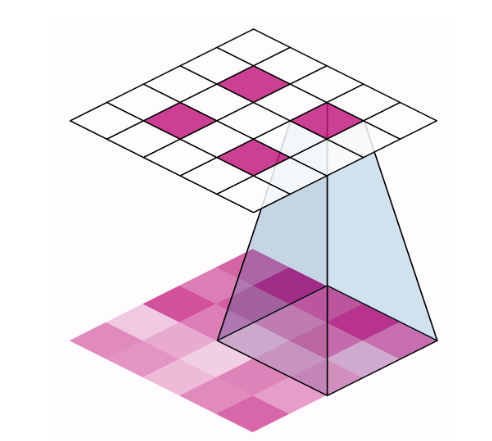

Stride'ın etkisi nedir? Her iki yönde de stride 1'den büyük olduğunda, kayan pencere her adımda girişteki bazı pikselleri atlayacaktır.

Sınıflandırma için yüksek kaliteli özellikler kullanmak istediğimizden, evrişim katmanları çoğunlukla strides=(1, 1) değerine sahip olacaktır. Stride'ı artırmak, özetimizde potansiyel olarak değerli bilgileri kaçırmamız anlamına gelir. Ancak, maksimum havuzlama katmanları neredeyse her zaman (2, 2) veya (3, 3) gibi 1'den büyük stride değerlerine sahip olacaktır, fakat bu değer pencerenin kendisinden büyük olmayacaktır.

Son olarak, stride'ın değeri her iki yönde de aynı sayı olduğunda, sadece bu sayıyı ayarlamanız yeterlidir; örneğin, strides=(2, 2) yerine, parametre ayarı için strides=2 kullanabilirsiniz.

**stride=(15, 1) desek nolur?**

Etki: Yatayda 15 piksel atlama, dikeyde her pikseli işleme

Sonuç: Yatay boyutta aşırı küçülme, dikey boyutta tam çözünürlük

Kullanım senaryoları:

Çok geniş görüntülerde yatay özellikleri özetleme

Dikey yönde detaylı bilgi gerektiren özel uygulamalar (örn. EKG sinyalleri)

### Konvolüsyon (Convolution) Nedir?
Konvolüsyon işlemi, görüntü gibi giriş verisi üzerinde küçük bir filtreyi (kernel) kaydırarak yapılır. Bu filtre, belirli bir pencere (örneğin 3x3 piksellik bir alan) üzerinde hesaplamalar yapar ve sonuçlarını yeni bir görüntü matrisi olarak üretir.

### Sorun: Sınır Pikselleri
Görüntünün ortasındaki piksellere filtreyi uygulamak kolaydır, çünkü filtre tamamen pikselin üzerinde yer alır. Ancak görüntünün sınırına geldiğimizde, filtreyi kaydırdığınızda, pencerenin bir kısmı görüntü dışında kalır. Bu noktada şu sorun ortaya çıkar: Görüntü sınırındaki piksellere nasıl işlem yapacağız?

### Padding (Dolgulama) Nedir?
Padding, bu sınır piksellerine nasıl davranacağımızı belirleyen bir tekniktir. Girdinin etrafına belirli sayıda ek piksel ekleyerek filtre işlemi sırasında sınır piksellerine de düzgün şekilde işlem yapmayı sağlar. TensorFlow'da iki temel seçenek var:

1. **`padding='valid'`**:
    - **Ne yapar?** Filtre, yalnızca girişin içinde kalır ve sınırda dışarı taşmaz. Girdinin kenarındaki piksellere tam olarak işlem yapmaz.
    - **Sonuç?** Çıktı boyutu küçülür, çünkü sınırdaki piksellere işlem yapılamaz.
    - **Avantajı:** Sadece girdi verisi üzerinde işlem yapılır, dolgu eklenmez.
    - **Dezavantajı:** Özellikle küçük görüntülerde, çıktı boyutu önemli ölçüde küçülebilir ve her konvolüsyon katmanı sonrasında görüntü boyutu daha da azalır.

2. **`padding='same'`**:
    - **Ne yapar?** Girdinin etrafına yeterli sayıda sıfır ekler (padding), böylece filtre görüntünün kenarlarına geldiğinde dışarı çıkmadan tam olarak uygulayabilir.
    - **Sonuç?** Çıktı boyutu, giriş boyutuyla aynı kalır (dolayısıyla "same" olarak adlandırılır).
    - **Avantajı:** Görüntünün boyutunu sabit tutar, daha derin katmanlı ağlar için faydalıdır.
    - **Dezavantajı:** Girdiye sıfırlarla doldurma işlemi eklenir, bu da sınırlı bir bilgi kaynağı sağlar.

### Özetle:
- **`valid`**: Çıktı daha küçük olur, sınır piksellerine tam işlem yapılmaz.
- **`same`**: Girdinin etrafına sıfırlar eklenir, böylece çıktı boyutu girişle aynı kalır.

**Kullanım Durumları:**
- Eğer görüntülerinizi küçültmek istemiyorsanız ve sınırdaki piksellere de işlem yapmak istiyorsanız, **`same`** padding daha uygundur.
- Eğer çıktıda küçülmeyi ve görüntü verisini tam işlem yapmak istiyorsanız, **`valid`** padding kullanılır.
 bu, sınırlardaki piksellerin etkisinin seyrelmesine neden olabilir. Aşağıdaki animasyon, 'same' dolgulama ile kayan bir pencere göstermektedir.

![](image24.png)

**VGG Modeli ve Padding**

İncelediğimiz VGG modeli, tüm evrişim katmanları için 'same' padding kullanır. Çoğu modern evrişimli sinir ağı (ConvNet), bu iki padding türünün bir kombinasyonunu kullanır. (Bu da ayarlanması gereken başka bir parametre!)

# Example

Kayan pencere parametrelerinin etkisini daha iyi anlamak için, düşük çözünürlüklü bir görüntü üzerinde özellik çıkarımını gözlemlemek yardımcı olabilir. Bu sayede bireysel pikselleri görebiliriz. Basit bir daireye bakalım.

Bir sonraki gizli hücre, bizim için bir görüntü ve çekirdek (kernel) oluşturacak.

![image.png](image25.png)

VGG mimarisi oldukça basittir. 1 stride'lı convolution ve 2×2 pencereli, 2 adımlı maksimum havuzlama kullanır. Tüm adımları göstermek için visiontools yardımcı betiğine bir fonksiyon ekledik.

![](image26.png)

Ve bu oldukça iyi çalışıyor! Çekirdek (kernel) yatay çizgileri tespit etmek üzere tasarlandı ve sonuçtaki özellik haritasında, girişin daha yatay kısımlarının en yüksek aktivasyona sahip olduğunu görebiliyoruz.

Peki ya stride'ı 3'e değiştirirsek ne olur?

![image.png](image27.png)

Bu, çıkarılan özelliğin kalitesini düşürüyor gibi görünüyor. Giriş dairemiz oldukça "ince detaylı", sadece 1 piksel genişliğinde. 3 adımlı bir evrişim, bundan iyi bir özellik haritası üretmek için fazla kaba kalıyor.

Bazen bir model, ilk katmanında daha büyük adımlı bir evrişim kullanır. Bu genellikle daha büyük bir çekirdekle (kernel) birleştirilir. Örneğin, ResNet50 modeli ilk katmanında 2 adımlı 7×7 çekirdekler kullanır. Bu, girişten çok fazla bilgi kaybetmeden büyük ölçekli özelliklerin üretimini hızlandırıyor gibi görünüyor.

**Sonuç**

Bu derste, hem convolution hem de pooling de yaygın olan karakteristik bir hesaplamaya baktık: kayan pencere ve bu katmanlardaki davranışını etkileyen parametreler. Bu tarz pencereli hesaplama, evrişimli ağların karakteristik özelliklerinin çoğuna katkıda bulunur ve işleyişlerinin temel bir parçasıdır.

**Sıra Sizde**

Alıştırmaya geçin. Orada kayan pencereleri keşfedecek, evrişim katmanlarını üst üste koymanın etkin pencere boyutunu nasıl artırabileceğini öğrenecek ve ayrıca evrişimin zaman serileri gibi tek boyutlu verilerle nasıl kullanılabileceğini öğreneceksiniz

**The Sliding Window** egzersizindeki ilk örneği kesinlikle çöz

**Alıcı Alan (Receptive Field)**

Bir nörondan geriye doğru tüm bağlantıları takip ederseniz, sonunda giriş görüntüsüne ulaşırsınız. Bir nöronun bağlı olduğu tüm giriş pikselleri, o nöronun alıcı alanını (receptive field) oluşturur. Alıcı alan, sadece bir nöronun hangi kısımdan bilgi aldığına işaret eder.

Daha önce gördüğümüz gibi, ilk katmanınız 3×3 kernel ile bir konvolüsyon katmanıysa, o katmandaki her nöron 3×3 boyutundaki bir piksel yamasından (patch) giriş alır (belki sınırda durumlar hariç).

Peki, başka bir 3×3 çekirdek ile konvolüsyon katmanı eklediğinizde ne olur? Aşağıdaki örneği düşünün:



![](image28.png)

Bu görsel, alıcı alanın (receptive field) ne olduğunu ve iki ardışık konvolüsyon katmanı ile alıcı alanın nasıl büyüdüğünü açıklıyor.

Anlamı:

1. 3×3 konvolüsyon katmanları kullanıldığında, her katmandaki nöron, giriş görüntüsünden belirli bir piksel yamasına (patch) bağlanır.

2. İlk katmandaki her nöron, doğrudan 3×3 boyutunda bir giriş pikselleri yamasına bağlıdır (yani, o bölgeden bilgi alır).

3. İkinci bir konvolüsyon katmanı eklendiğinde, alıcı alan genişler. Görseldeki en üstteki nöron, önceki katmandaki 3×3 boyutundaki nöronlara bağlıdır. Bu katmandaki her nöron ise, giriş katmanındaki başka 3×3 piksellik yamalara bağlıdır.

Sonuç olarak, en üstteki nöronun alıcı alanı genişler ve toplamda 5×5 boyutunda bir giriş yamasından bilgi alır. Yani, üst katmandaki nöron, girişteki daha geniş bir bölgeyi "görmektedir."

**Alıcı Alanın Büyümesi**

Şimdi, eğer üçüncü bir 3×3 çekirdeğe sahip konvolüsyon katmanı ekleseydiniz, bu katmandaki nöronların alıcı alanı ne olurdu?

Üçüncü katman bir 7×7 alıcı alanına sahip olurdu.

### Why Stack Layers Like This?

Üç adet (3×3) çekirdeğin (kernel) toplamda 27 parametresi vardır, oysa tek bir (7×7) çekirdek 49 parametreye sahiptir, ancak her ikisi de aynı alıcı alanı (receptive field) oluşturur. Bu katmanları üst üste dizme tekniği, konvolüsyonel ağların (convnets) çok fazla parametre eklemeden büyük alıcı alanları oluşturabilmesinin yollarından biridir. Bir sonraki derste bunu kendiniz nasıl yapacağınızı göreceksiniz!


Bundan sonra notebook a tekrar bak çünkü kodlar burada çalışmıyor